In [ ]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving scores.csv to scores.csv


In [ ]:
scores = pd.read_csv('scores.csv')

<div class="alert alert-block alert-info">
<b>Column Details for scores file</b>
</div>

* number (patient identifier)
* days (number of days of measurements)
* gender (1 or 2 for female or male)
* age (age in age groups)
* afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
* melanch (1: melancholia, 2: no melancholia)
* inpatient (1: inpatient, 2: outpatient)
* edu (education grouped in years)
* marriage (1: married or cohabiting, 2: single)
* work (1:working or studying, 2: unemployed/sick leave/pension)
* madrs1 (MADRS score when measurement started)
* madrs2 (MADRS when measurement stopped).

In [ ]:
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,06-Oct,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,06-Oct,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,06-Oct,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,Nov-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,Nov-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,06-Oct,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,Nov-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,Nov-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,06-Oct,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,06-Oct,1.0,2.0,28.0,21.0


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [ ]:
scores['DeltaMADRS'] = scores.madrs2 - scores.madrs1
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,06-Oct,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,06-Oct,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,06-Oct,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,Nov-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,Nov-15,2.0,2.0,26.0,26.0,0.0


In [ ]:
scores.edu = scores['edu'].replace(' ', np.NaN)
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,06-Oct,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,06-Oct,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,06-Oct,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,Nov-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,Nov-15,2.0,2.0,26.0,26.0,0.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,06-Oct,1.0,2.0,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,Nov-15,2.0,1.0,24.0,25.0,1.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,Nov-15,1.0,2.0,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,06-Oct,1.0,2.0,26.0,26.0,0.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,06-Oct,1.0,2.0,28.0,21.0,-7.0


In [ ]:
scores.age = scores.age.astype('category')
scores.gender = scores.gender.astype('category')
scores.edu = scores.edu.astype('category')
scores.afftype = scores.afftype.astype('category')
scores.melanch = scores.melanch.astype('category')
scores.inpatient = scores.inpatient.astype('category')
scores.marriage = scores.marriage.astype('category')
scores.work = scores.work.astype('category')
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,2,35-39,2.0,2.0,2.0,06-Oct,1.0,2.0,19.0,19.0,0.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,06-Oct,2.0,2.0,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,06-Oct,2.0,2.0,24.0,25.0,1.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,Nov-15,1.0,1.0,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,Nov-15,2.0,2.0,26.0,26.0,0.0


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      55 non-null     object  
 1   days        55 non-null     int64   
 2   gender      55 non-null     category
 3   age         55 non-null     category
 4   afftype     23 non-null     category
 5   melanch     20 non-null     category
 6   inpatient   23 non-null     category
 7   edu         22 non-null     category
 8   marriage    23 non-null     category
 9   work        23 non-null     category
 10  madrs1      23 non-null     float64 
 11  madrs2      23 non-null     float64 
 12  DeltaMADRS  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
scores.gender = scores['gender'].cat.rename_categories({1.0 : 'female',2.0:'male'})
scores.afftype = scores['afftype'].cat.rename_categories({1.0 : 'bipolar II',2.0:'unipolar', 3: 'bipolar I'})
scores.melanch = scores['melanch'].cat.rename_categories({1.0 : 'melancholia',2.0:'No melancholia'})
scores.inpatient = scores['inpatient'].cat.rename_categories({1.0 : 'inpatient',2.0:'outpatient'})
scores.marriage = scores['marriage'].cat.rename_categories({1.0 : 'married/cohabitating',2.0:'single'})
scores.work = scores['work'].cat.rename_categories({1.0 : 'Work/Study',2.0:'Unemployed/Sick leave/Pension'})
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,DeltaMADRS
0,condition_1,11,male,35-39,unipolar,No melancholia,outpatient,06-Oct,married/cohabitating,Unemployed/Sick leave/Pension,19.0,19.0,0.0
1,condition_2,18,male,40-44,bipolar II,No melancholia,outpatient,06-Oct,single,Unemployed/Sick leave/Pension,24.0,11.0,-13.0
2,condition_3,13,female,45-49,unipolar,No melancholia,outpatient,06-Oct,single,Unemployed/Sick leave/Pension,24.0,25.0,1.0
3,condition_4,13,male,25-29,unipolar,No melancholia,outpatient,Nov-15,married/cohabitating,Work/Study,20.0,16.0,-4.0
4,condition_5,13,male,50-54,unipolar,No melancholia,outpatient,Nov-15,single,Unemployed/Sick leave/Pension,26.0,26.0,0.0
5,condition_6,7,female,35-39,unipolar,No melancholia,outpatient,06-Oct,married/cohabitating,Unemployed/Sick leave/Pension,18.0,15.0,-3.0
6,condition_7,11,female,20-24,bipolar II,NaN,outpatient,Nov-15,single,Work/Study,24.0,25.0,1.0
7,condition_8,5,male,25-29,unipolar,NaN,outpatient,Nov-15,married/cohabitating,Unemployed/Sick leave/Pension,20.0,16.0,-4.0
8,condition_9,13,male,45-49,bipolar II,NaN,outpatient,06-Oct,married/cohabitating,Unemployed/Sick leave/Pension,26.0,26.0,0.0
9,condition_10,9,male,45-49,unipolar,No melancholia,outpatient,06-Oct,married/cohabitating,Unemployed/Sick leave/Pension,28.0,21.0,-7.0


In [ ]:
scores_condition = scores[scores.number.str.contains('condition')].copy()
scores_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      23 non-null     object  
 1   days        23 non-null     int64   
 2   gender      23 non-null     category
 3   age         23 non-null     category
 4   afftype     23 non-null     category
 5   melanch     20 non-null     category
 6   inpatient   23 non-null     category
 7   edu         22 non-null     category
 8   marriage    23 non-null     category
 9   work        23 non-null     category
 10  madrs1      23 non-null     float64 
 11  madrs2      23 non-null     float64 
 12  DeltaMADRS  23 non-null     float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
scores_control = scores[scores.number.str.contains('control')].copy()
scores_control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 23 to 54
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      32 non-null     object  
 1   days        32 non-null     int64   
 2   gender      32 non-null     category
 3   age         32 non-null     category
 4   afftype     0 non-null      category
 5   melanch     0 non-null      category
 6   inpatient   0 non-null      category
 7   edu         0 non-null      category
 8   marriage    0 non-null      category
 9   work        0 non-null      category
 10  madrs1      0 non-null      float64 
 11  madrs2      0 non-null      float64 
 12  DeltaMADRS  0 non-null      float64 
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
features_num = ['days','madrs1','madrs2','DeltaMADRS']
features_cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

MADRS interpretation

1. 0 to 6: normal range (no depression)
2. 7 to 19 : mild depression
3. 20 to 34: moderate depression
4. 35 and greater: severe depression
5. 60 or greater: “very severe depression

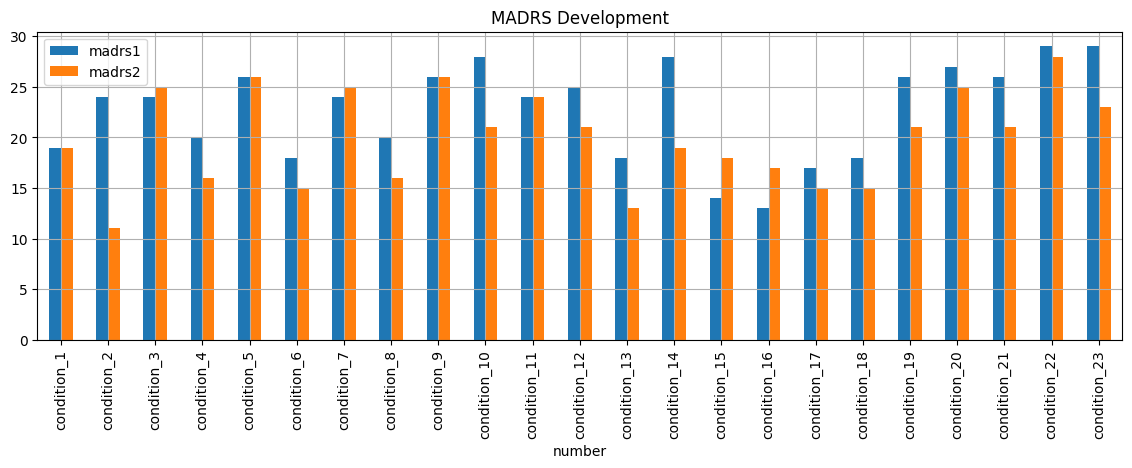

In [ ]:
# barplot of MADRS scores (before/after)

temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
scores_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

In [ ]:
fig = px.bar(scores, x = scores["number"], y = scores["days"], title = "Days Observed")
fig.show()

In [ ]:
fig = px.histogram(scores['gender'], x="gender", title = "1: Female \t\t\t 2: Male")
fig.show()

In [ ]:
fig = px.histogram(scores['age'].sort_values(), x="age",  title = "Age")
fig.show()

In [ ]:
fig = px.histogram(scores, x="afftype", title = "1: bipolar II \t\t\t 2: unipolar depressive \t\t\t 3: bipolar I")
fig.show()

In [ ]:
fig = px.histogram(scores, x="melanch", title = "1: melancholia \t\t\t 2: no melancholia")
fig.show()

In [ ]:
fig = px.histogram(scores, x="madrs1", title = "MADRS score when measurement started")
fig.show()

In [ ]:
fig = px.histogram(scores, x="madrs2", title = "MADRS when measurement stopped")
fig.show()

In [ ]:
fig = px.histogram(scores, x="inpatient", title = "Number of Inpatients. 1: Inpatients \t\t\t 2: Outpatients")
fig.show()

In [ ]:
fig = px.histogram(scores, x="marriage", title = "1: Married \t\t\t 2: Not Married")
fig.show()

In [ ]:
fig = px.histogram(scores, x="work", title = "1: Working \t\t\t 2: Not Working")
fig.show()

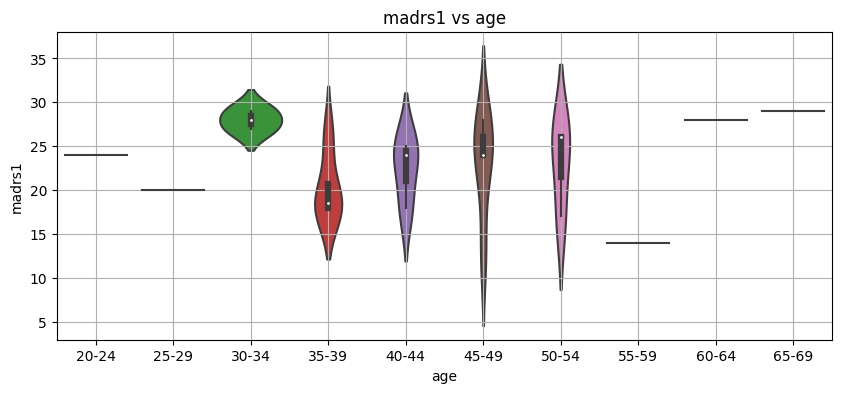

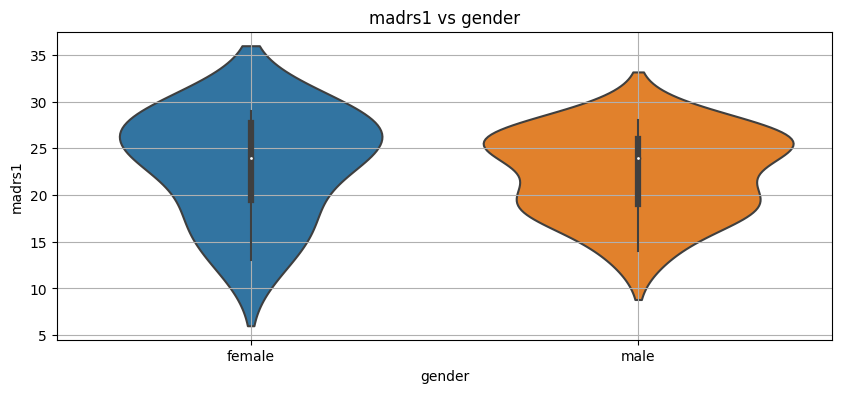

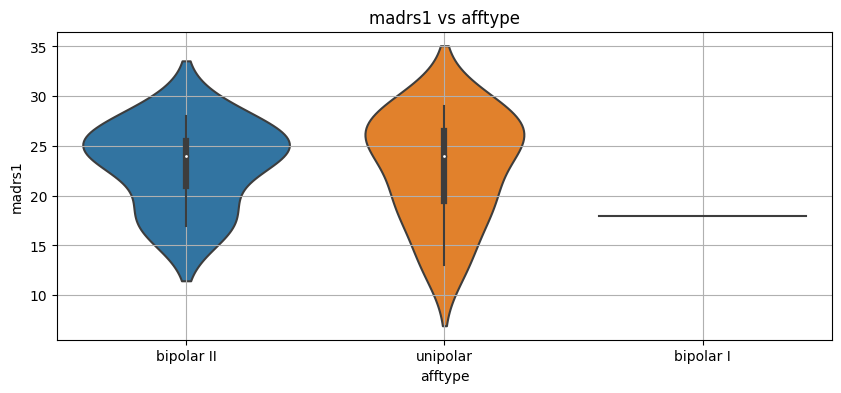

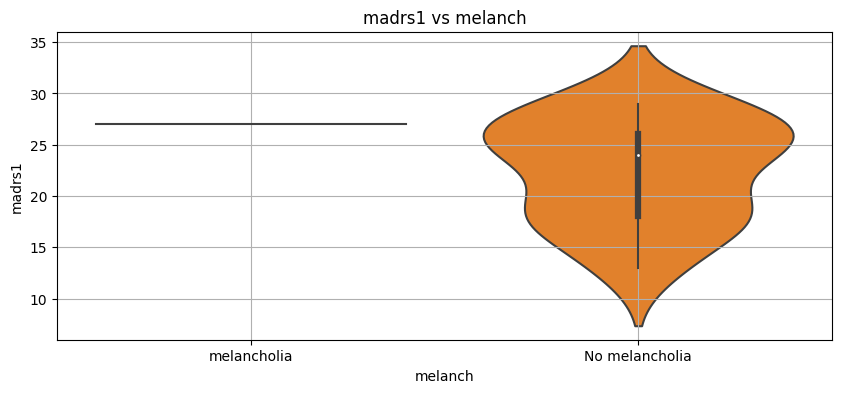

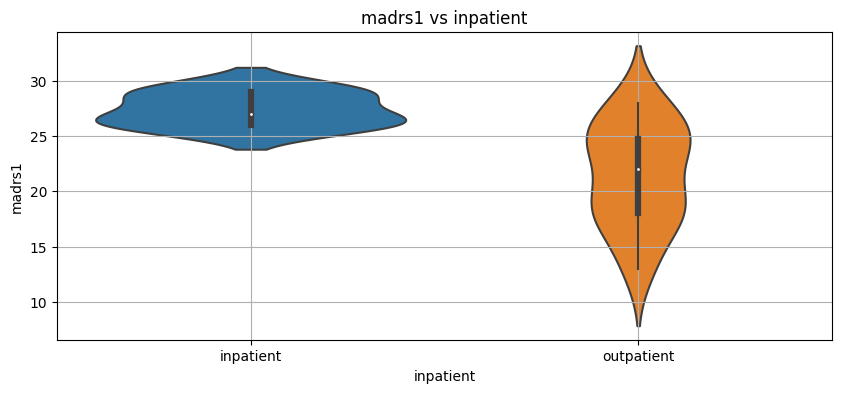

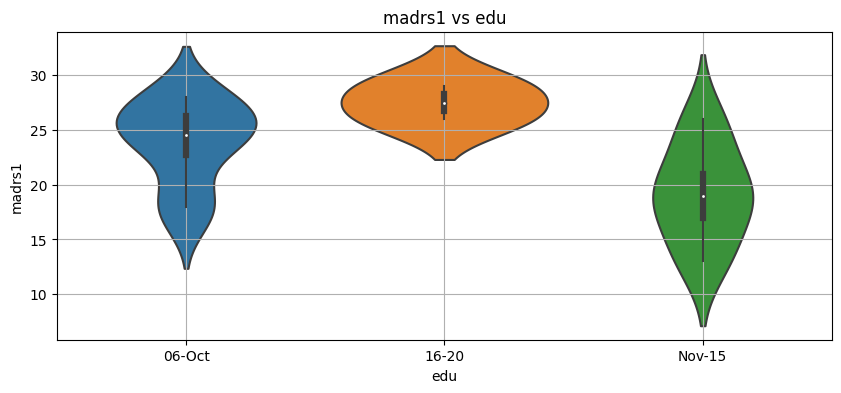

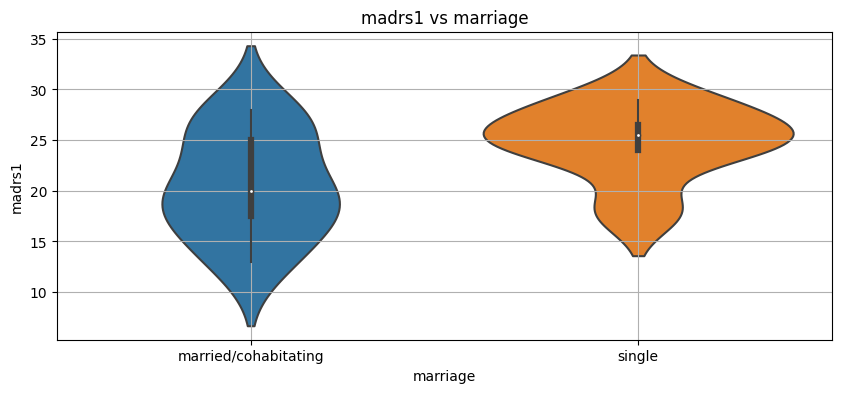

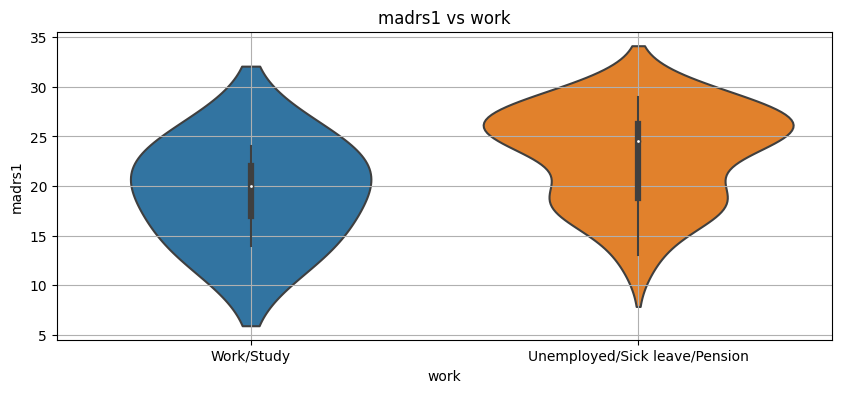

In [ ]:
# impact of feature on score madrs1 (at begin of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=scores_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

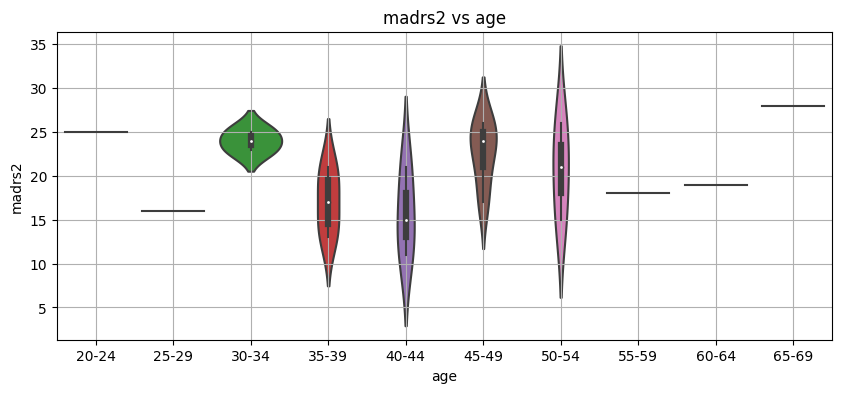

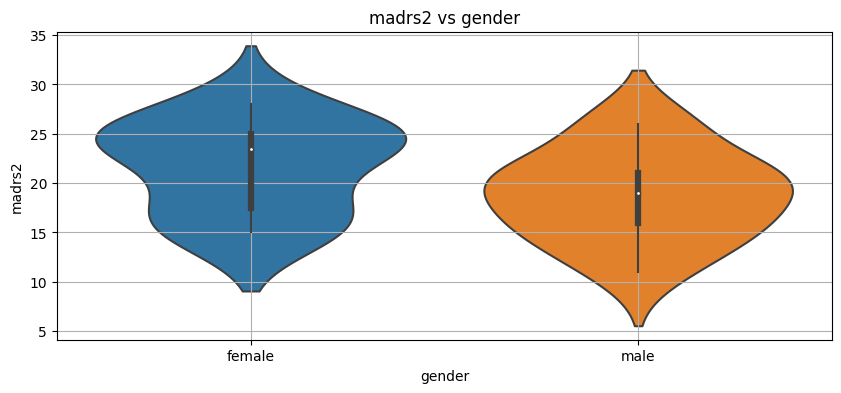

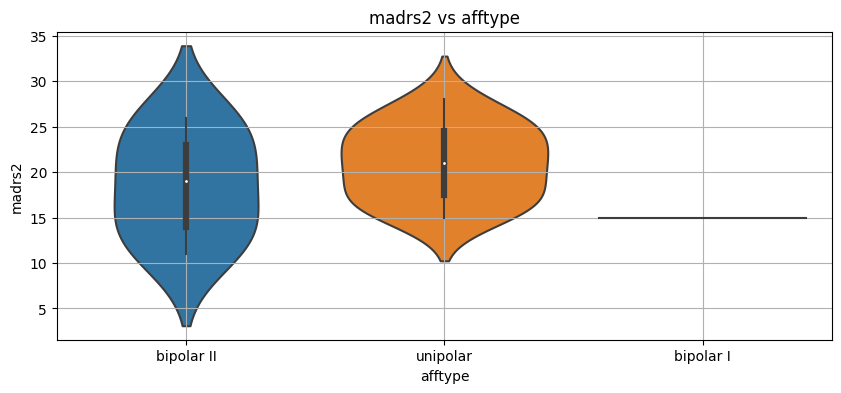

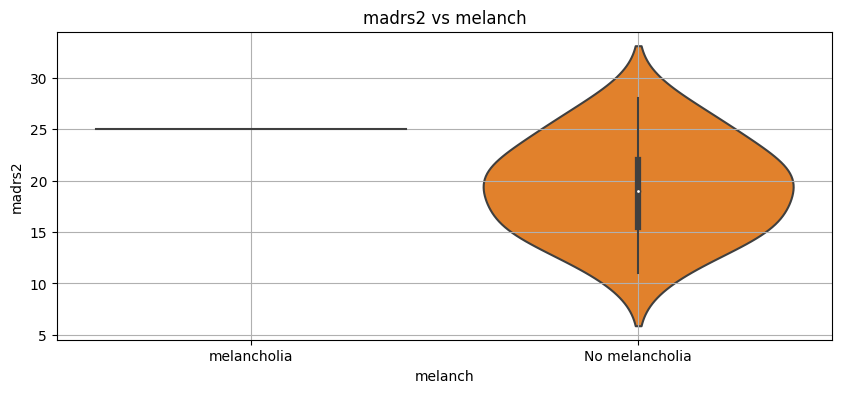

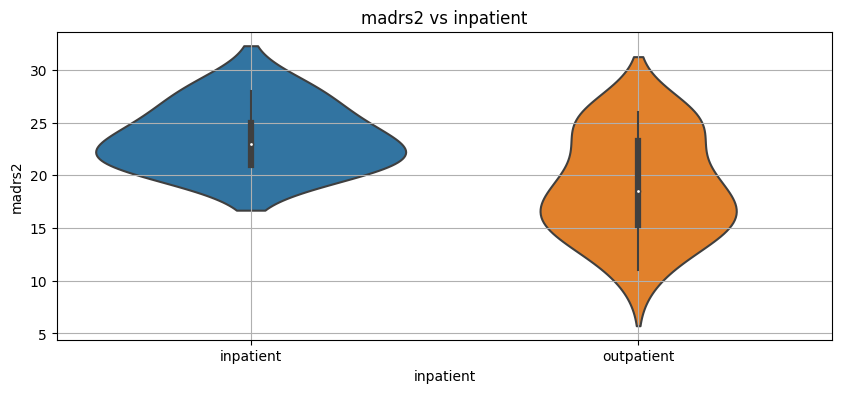

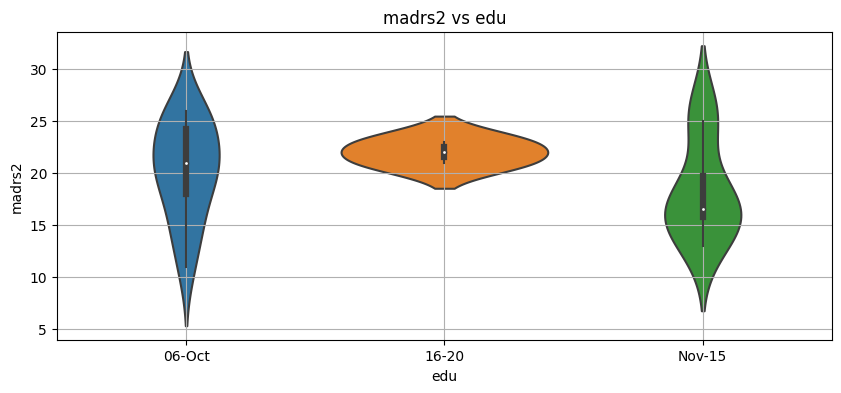

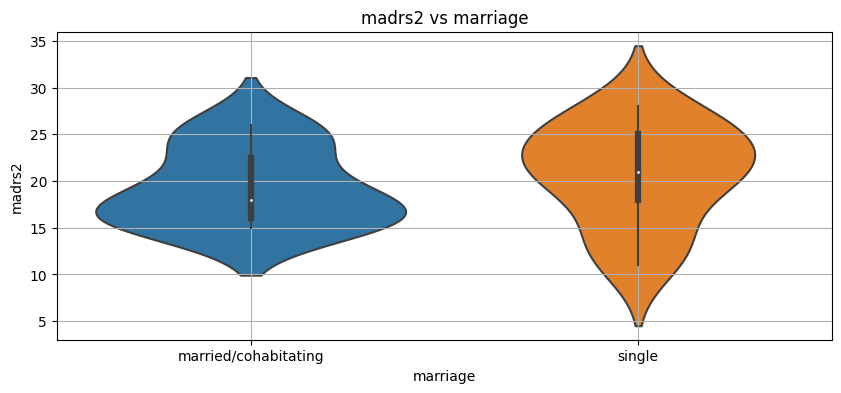

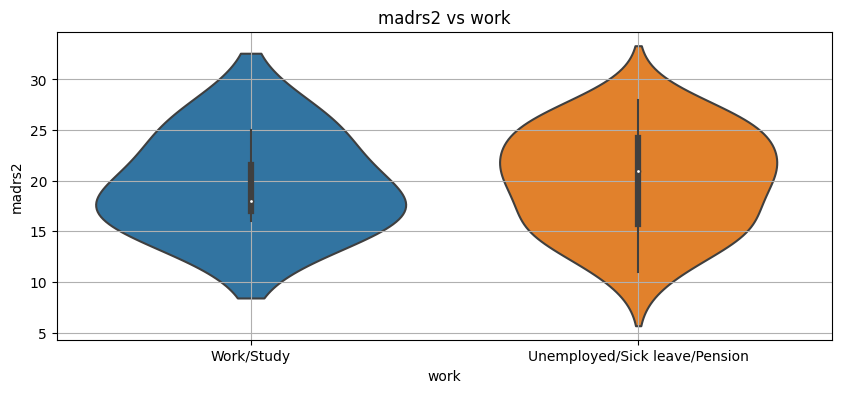

In [ ]:
# impact of feature on score madrs2 (at end of activity measurement)
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=scores_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

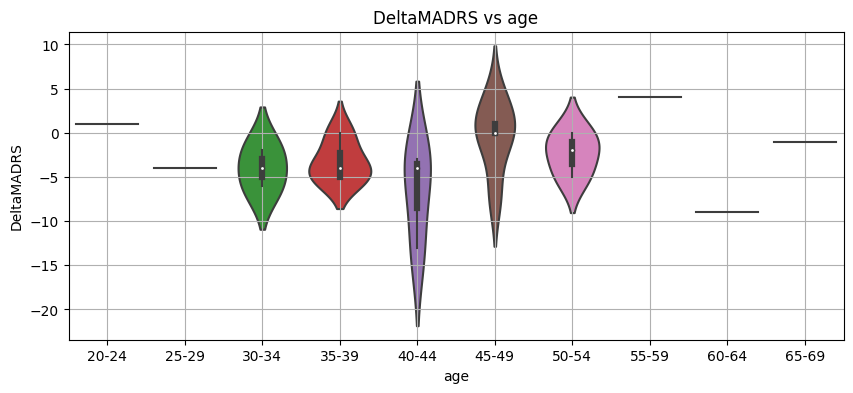

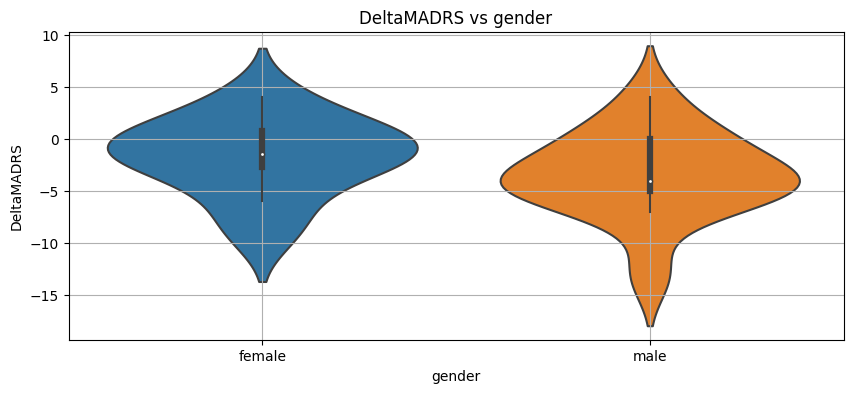

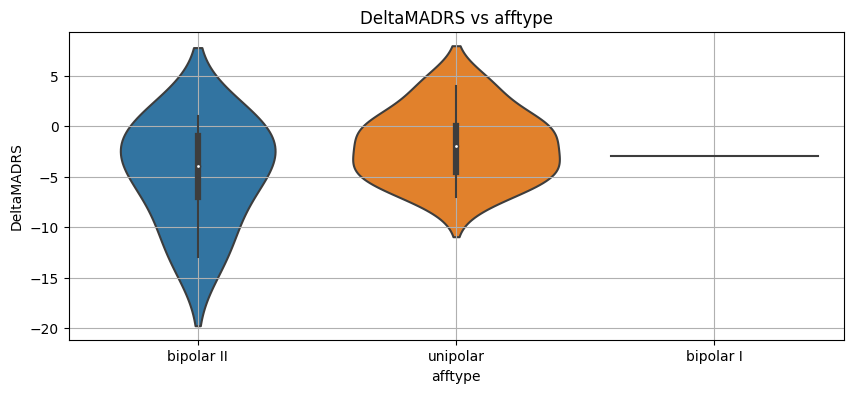

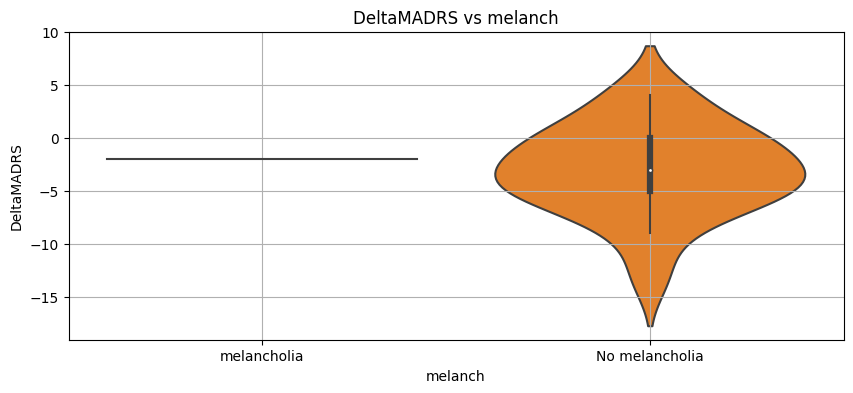

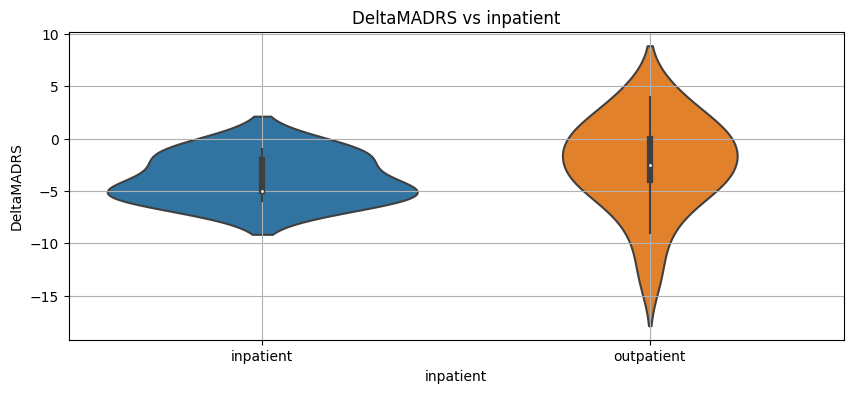

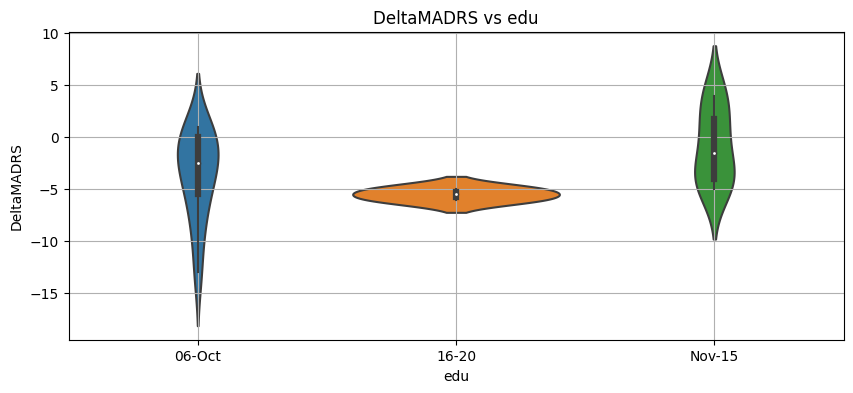

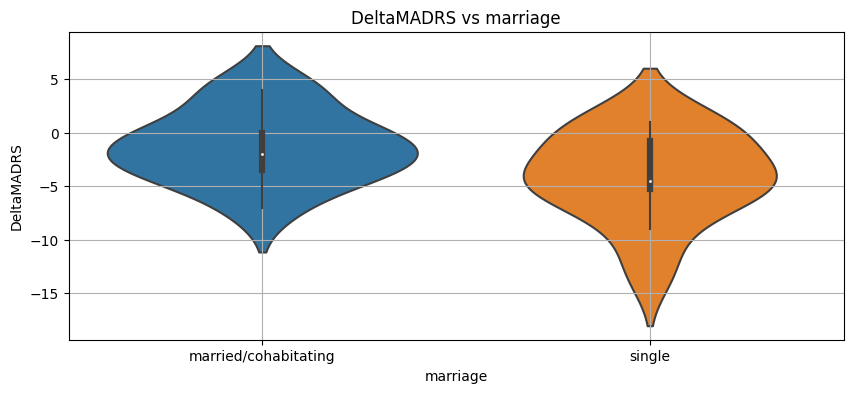

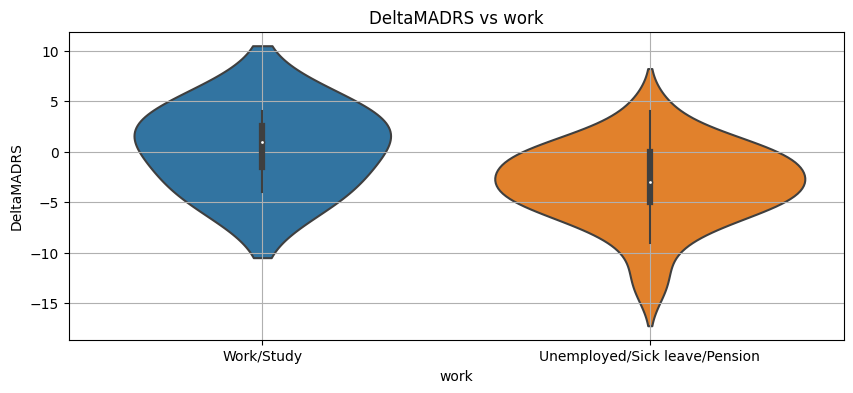

In [ ]:
# impact of feature on score difference DeltaMADRS = madrs2 - madrs1
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=scores_condition, x=f, y='DeltaMADRS')
    plt.title('DeltaMADRS vs ' + f)
    plt.grid()
    plt.show()

### **Correlations**

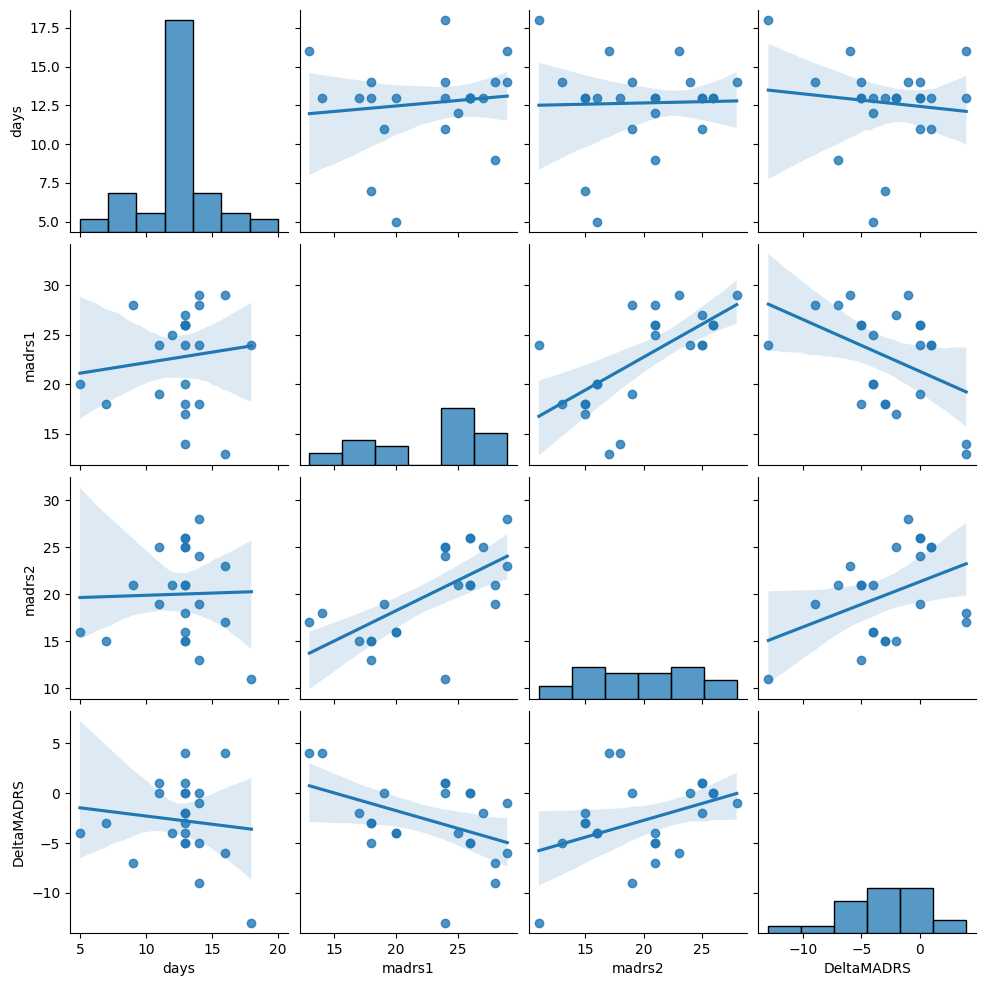

In [ ]:
sns.pairplot(scores[features_num], kind='reg')
plt.show()

The dataset has two directories

**Condition Directory** - The condition directory in the dataset consists of actigraphy data collected from 23 unipolar and bipolar depressed patients. Five subjects were hospitalized during their data collection period, and 18 were outpatients. The severity level of the ongoing depression was rated by a clinician on the Montgomery-Asberg Depression Rating Scale at the beginning and conclusion of the motor activity recordings.

**Control Directory** - The control directory in the dataset contains actigraphy data from 32 non-depressed contributors, consisting of 23 hospital employees, 5 students and 4 former patients without current psychiatric symptoms.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
condition_files = os.listdir("/content/drive/My Drive/depression_data/condition")
control_files = os.listdir("/content/drive/My Drive/depression_data/control")

In [ ]:
condition = pd.read_csv("/content/drive/My Drive/depression_data/condition/condition_21.csv")
control = pd.read_csv("/content/drive/My Drive/depression_data/control/control_8.csv")

In [ ]:
condition.head(10)

,timestamp,date,activity
0,2002-06-13 13:35:00,2002-06-13,0
1,2002-06-13 13:36:00,2002-06-13,349
2,2002-06-13 13:37:00,2002-06-13,111
3,2002-06-13 13:38:00,2002-06-13,38
4,2002-06-13 13:39:00,2002-06-13,3
5,2002-06-13 13:40:00,2002-06-13,79
6,2002-06-13 13:41:00,2002-06-13,296
7,2002-06-13 13:42:00,2002-06-13,8
8,2002-06-13 13:43:00,2002-06-13,0
9,2002-06-13 13:44:00,2002-06-13,0


In [ ]:
control.head(10)

,timestamp,date,activity
0,2003-11-04 09:00:00,2003-11-04,4
1,2003-11-04 09:01:00,2003-11-04,160
2,2003-11-04 09:02:00,2003-11-04,3
3,2003-11-04 09:03:00,2003-11-04,3
4,2003-11-04 09:04:00,2003-11-04,3
5,2003-11-04 09:05:00,2003-11-04,3
6,2003-11-04 09:06:00,2003-11-04,3
7,2003-11-04 09:07:00,2003-11-04,3
8,2003-11-04 09:08:00,2003-11-04,3
9,2003-11-04 09:09:00,2003-11-04,3


In [ ]:
len(condition['activity'])

20487

In [ ]:
len(control['activity'])

28918

In [ ]:
condition.activity.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    20487.000000
mean        79.480061
std        214.975597
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
90%        296.000000
99%       1080.900000
max       3869.000000
Name: activity, dtype: float64

In [ ]:
control.activity.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99])

count    28918.000000
mean       290.488104
std        455.954150
min          0.000000
1%           0.000000
10%          0.000000
25%          0.000000
50%         21.000000
75%        483.000000
90%        887.000000
99%       2008.000000
max       6321.000000
Name: activity, dtype: float64

In [ ]:
fig = px.histogram(condition, x="activity", nbins=25, title = "Activity of a Condition Subject")
fig.show()

In [ ]:
fig = px.histogram(control, x="activity", nbins=25,  title = "Activity of a Control Subject")
fig.show()

In [ ]:
subject_id = scores['number']
subject_id = list(subject_id)

In [ ]:
activity = []
days = []
for file in condition_files:
    condition = pd.read_csv("/content/drive/My Drive/depression_data/condition/"+file)
    activity.append(condition['activity'].values.sum())
    days.append(scores['days'][subject_id.index(file[:-4])])

In [ ]:
condition_activity =  pd.DataFrame()
condition_activity['Name'] = condition_files
condition_activity['Total Activity'] = activity
condition_activity["Days"] = days

In [ ]:
condition_activity['Activity per day'] = condition_activity['Total Activity']/condition_activity['Days']

In [ ]:
condition_activity_sorted = condition_activity.sort_values(by = "Activity per day")

In [ ]:
condition_activity_sorted.describe()

,Total Activity,Days,Activity per day
count,2.300000e+01,23.000000,23.000000
mean,3.911972e+06,12.652174,331199.634542
std,1.736366e+06,2.773391,179259.131343
min,1.413779e+06,5.000000,108752.230769
25%,2.682768e+06,12.500000,198194.983516
50%,3.569050e+06,13.000000,279504.083333
75%,5.774372e+06,14.000000,425719.258242
max,6.379462e+06,18.000000,713810.000000


In [ ]:
fig = px.histogram(condition_activity_sorted, x = "Activity per day", nbins = 25, title = "Activity per Day of Condition Subjects")
fig.show()

In [ ]:
activity = []
days = []
for file in control_files:
    control = pd.read_csv("/content/drive/My Drive/depression_data/control/"+file)
    activity.append(control['activity'].values.sum())
    days.append(scores['days'][subject_id.index(file[:-4])])

In [ ]:
control_activity =  pd.DataFrame()
control_activity['Name'] = control_files
control_activity['Total Activity'] = activity
control_activity["Days"] = days

In [ ]:
control_activity['Activity per day'] = control_activity['Total Activity']/control_activity['Days']

In [ ]:
control_activity_sorted = control_activity.sort_values(by = "Activity per day")

In [ ]:
control_activity_sorted.describe()

,Total Activity,Days,Activity per day
count,3.200000e+01,32.000000,32.000000
mean,6.007763e+06,12.562500,486454.695887
std,1.946870e+06,2.313181,142321.133648
min,3.114809e+06,8.000000,230844.000000
25%,4.736042e+06,13.000000,381600.480769
50%,5.879564e+06,13.000000,495323.769231
75%,7.394953e+06,13.000000,591826.865385
max,1.255406e+07,20.000000,759032.375000


In [ ]:
fig = px.histogram(control_activity_sorted, x="Activity per day", nbins=25, title = "Activity per Day of Control Subjects")
fig.show()

In [ ]:
fig = px.line(condition, x=condition['timestamp'], y=condition['activity'], title='Activity vs time (Condition Group)')
fig.show()

In [ ]:
fig = px.line(control, x=control['timestamp'], y=control['activity'], title='Activity vs time (Control Group)')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=control['activity'],
                    mode='markers' , name='Control'))
fig.add_trace(go.Scatter(y=condition['activity'],
                   mode='markers', name='condition'))
fig.update_layout(title='Activity vs time (Condition and Control)',
                   xaxis_title='time unit',
                   yaxis_title='Activity')
fig.show()

## Extracting Data from Condition Directory

In [ ]:
daily_threshold = 10

In [ ]:
mean_list = []
std_list = []
q99_list = []
std_q99_list = []

for i in range(23):
    j = 1+i
    my_file = '/content/drive/My Drive/depression_data/condition/condition_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)

    # group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    # remove incomplete days (24*60 minutes = 1440)
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]

    print(df_temp_by_date)
    print()

    # extract statistics
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity

    # add results to lists
    mean_list.append(mean_temp)
    std_list.append(std_temp)
    q99_list.append(mean_q99_temp)
    std_q99_list.append(std_q99_temp)

Extracting from: /content/drive/My Drive/depression_data/condition/condition_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-05-08  1440  156.247222   890.00     1954
2   2003-05-09  1440  124.135417   948.00     1672
3   2003-05-10  1440  134.961806  1097.35     2146
4   2003-05-11  1440   99.439583   759.00     2080
5   2003-05-12  1440  316.874306  2055.04     3526
6   2003-05-13  1440  108.475694   879.08     2284
7   2003-05-14  1440  155.684722  1182.00     1836
8   2003-05-15  1440  170.877083  1146.00     1725
9   2003-05-16  1440  190.508333  1167.96     2016
10  2003-05-17  1440  177.760417  1205.79     1894
11  2003-05-18  1440   97.729167   966.30     2080
12  2003-05-19  1440  168.102778  1474.00     2586
13  2003-05-20  1440  111.488194   948.00     1260
14  2003-05-21  1440  199.597222  2839.00     3418
15  2003-05-22  1440   71.112500  1167.96     1521

Extracting from: /content/drive/My Drive/depression_data/condition/condition_2.csv
          date   

In [ ]:
condition_stats = pd.DataFrame(zip(scores.number, mean_list, q99_list, std_list, std_q99_list),
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# add coefficient of variation (stdev / mean)
condition_stats['CV_MeanAct'] = condition_stats.Std_MeanAct / condition_stats.Mean_MeanAct
condition_stats['CV_Q99Act'] = condition_stats.Std_Q99Act / condition_stats.Mean_Q99Act
condition_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,211.280738,1538.777368,80.924414,528.810407,0.383018,0.343656
2,condition_3,280.810714,1605.270000,61.577770,287.349708,0.219286,0.179004
3,condition_4,286.064732,1710.240714,166.280241,609.340002,0.581268,0.356289
4,condition_5,172.622371,1300.538571,46.444164,259.816491,0.269051,0.199776
5,condition_6,194.754861,1428.765000,38.794611,153.984219,0.199197,0.107774
6,condition_7,295.975588,1651.887692,148.639974,401.224692,0.502203,0.242889
7,condition_8,200.443750,1804.810000,95.169158,745.719621,0.474792,0.413185
8,condition_9,177.031624,1420.541538,25.805786,151.907215,0.145769,0.106936
9,condition_10,296.403373,1691.552143,84.898469,256.541836,0.286429,0.151661


In [ ]:
condition_stats.corr()

<ipython-input-59-dec29a0e9576>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.911266,0.755293,0.262670,0.213459,-0.214997
Mean_Q99Act,0.911266,1.000000,0.746642,0.453874,0.326929,-0.085445
Std_MeanAct,0.755293,0.746642,1.000000,0.587979,0.745768,0.156139
Std_Q99Act,0.262670,0.453874,0.587979,1.000000,0.592501,0.811374
CV_MeanAct,0.213459,0.326929,0.745768,0.592501,1.000000,0.373447
CV_Q99Act,-0.214997,-0.085445,0.156139,0.811374,0.373447,1.000000


## Extracting Data from Control Directory

In [ ]:
mean_list_control = []
std_list_control = []
q99_list_control = []
std_q99_list_control = []

for i in range(32):
    j = 1+i
    my_file = '/content/drive/My Drive/depression_data/control/control_' + str(j) + '.csv'
    print('Extracting from:', my_file)
    df_temp = pd.read_csv(my_file)

    # group by date
    df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
        n = pd.NamedAgg(column='activity', aggfunc='count'),
        mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
        q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
        max_act = pd.NamedAgg(column='activity', aggfunc='max')
    )

    # remove incomplete days (24*60 minutes = 1440)
    df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # remove days with unreasonable low average daily activity
    df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]

    print(df_temp_by_date)
    print()

    # extract statistics
    mean_temp = df_temp_by_date.mean_act.mean() # mean of mean daily activity
    std_temp = df_temp_by_date.mean_act.std() # stdev of mean daily activity
    mean_q99_temp = df_temp_by_date.q99_act.mean() # mean of 99th percentiles of daily activity
    std_q99_temp = df_temp_by_date.q99_act.std() # stdev of 99th percentiles of daily activity

    # add results to lists
    mean_list_control.append(mean_temp)
    std_list_control.append(std_temp)
    q99_list_control.append(mean_q99_temp)
    std_q99_list_control.append(std_q99_temp)

Extracting from: /content/drive/My Drive/depression_data/control/control_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-03-19  1440  185.568056  1607.00     3097
2   2003-03-20  1440  225.981250  1712.00     2651
3   2003-03-21  1440  169.663194  1375.00     2066
4   2003-03-22  1440  183.690972  1290.00     2415
5   2003-03-23  1440  347.075000  1332.00     1824
6   2003-03-24  1440  194.423611  1638.72     2341
7   2003-03-25  1440  310.715278  1882.00     2651
8   2003-03-26  1440  199.518750  1520.95     3195
9   2003-03-27  1440  183.131944  1358.23     2199
10  2003-03-28  1440  218.872222  1745.55     2415
11  2003-03-29  1440  276.368750  1509.00     4221
13  2003-03-31  1440  232.002778  1918.60     6117
14  2003-04-01  1440  109.022917  1418.00     2911
15  2003-04-02  1440  128.501389  3156.78     5575
16  2003-04-03  1440   69.356250  2003.00     3506
17  2003-04-04  1440   55.559028  2492.00     3097

Extracting from: /content/drive/My Drive/depression_d

In [ ]:
control_stats =  pd.DataFrame(zip(scores.number, mean_list_control, q99_list_control, std_list_control, std_q99_list_control),
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# add coefficient of variation (stdev / mean)
control_stats['CV_MeanAct'] = control_stats.Std_MeanAct / control_stats.Mean_MeanAct
control_stats['CV_Q99Act'] = control_stats.Std_Q99Act / control_stats.Mean_Q99Act
control_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,193.090712,1747.426875,79.180375,488.183345,0.410068,0.279373
1,condition_2,407.458697,2044.739048,137.730227,352.116906,0.338023,0.172206
2,condition_3,249.641270,1502.540000,52.558532,193.967304,0.210536,0.129093
3,condition_4,186.394213,1711.935333,59.268265,298.854188,0.317973,0.174571
4,condition_5,246.008987,1403.467059,132.278665,525.196868,0.537699,0.374214
5,condition_6,279.535294,2064.458235,124.969577,572.223333,0.447062,0.277178
6,condition_7,360.261161,2557.209286,127.277609,1520.288118,0.353293,0.594511
7,condition_8,380.200787,1970.728667,125.202102,613.697773,0.329305,0.311407
8,condition_9,141.170370,1145.389333,47.241626,269.018427,0.334643,0.234871
9,condition_10,290.439782,1865.657143,83.298433,324.491722,0.286801,0.173929


In [ ]:
control_stats.corr()

<ipython-input-62-032501258b88>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.849838,0.684530,0.495685,-0.087928,0.273292
Mean_Q99Act,0.849838,1.000000,0.644619,0.690179,0.012979,0.425698
Std_MeanAct,0.684530,0.644619,1.000000,0.721062,0.659783,0.699030
Std_Q99Act,0.495685,0.690179,0.721062,1.000000,0.459930,0.932576
CV_MeanAct,-0.087928,0.012979,0.659783,0.459930,1.000000,0.661419
CV_Q99Act,0.273292,0.425698,0.699030,0.932576,0.661419,1.000000


## Comparing Condition and Control

Basic stats of condition group

In [ ]:
condition_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,177.359263,1293.282746,60.221801,318.413688,0.327726,0.248803
std,75.725958,335.760931,39.333135,168.601320,0.135601,0.122393
min,65.370585,665.491429,9.301415,96.547265,0.130202,0.106936
25%,120.196612,1030.523544,28.137077,190.752177,0.229600,0.158577
50%,172.622371,1300.538571,60.377039,287.349708,0.286429,0.199776
75%,235.399106,1574.730899,73.919049,389.201044,0.432363,0.349973
max,296.403373,1804.810000,166.280241,745.719621,0.581268,0.572878


Basic stats of control group

In [ ]:
control_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,263.666975,1696.860976,81.291596,410.943519,0.310272,0.230448
std,71.689552,405.953265,31.768637,309.473258,0.084625,0.118904
min,139.782917,915.619333,43.967642,134.236127,0.144795,0.083808
25%,201.082937,1401.476008,54.296764,213.154471,0.250760,0.140532
50%,262.758110,1729.681104,70.213031,307.159779,0.318632,0.197742
75%,315.547474,1867.617679,119.680854,497.436726,0.354754,0.284825
max,407.458697,2635.942143,137.730227,1520.288118,0.537699,0.594511


Visualising the Comparison

In [ ]:
# combine statistics into one common data frame
condition_stats['Group'] = 'Condition'
control_stats['Group'] = 'Control'
combined_stats = pd.concat([condition_stats, control_stats])

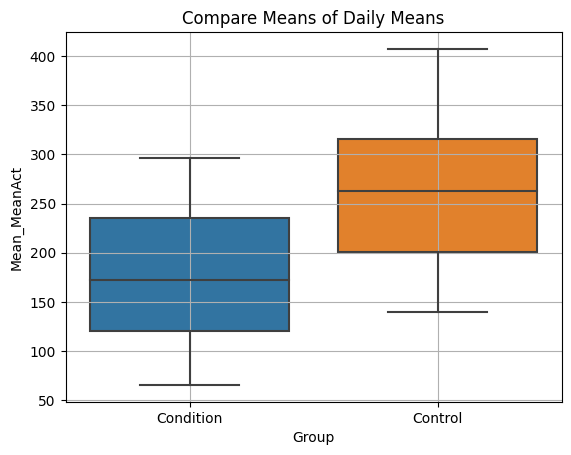

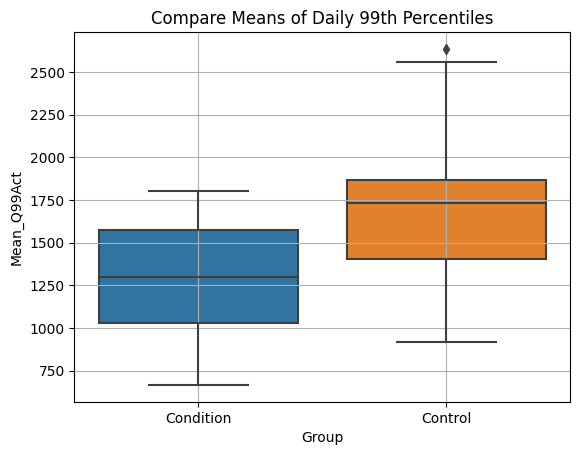

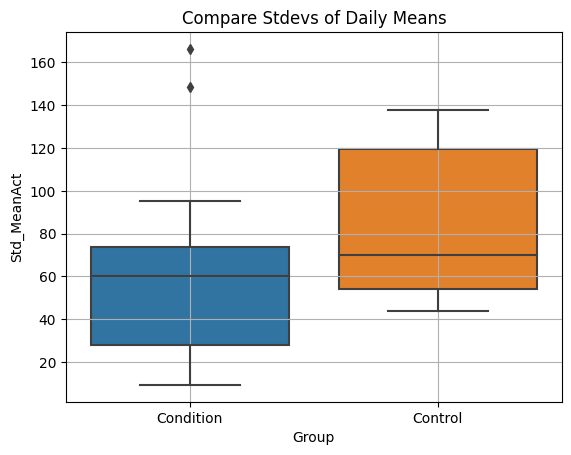

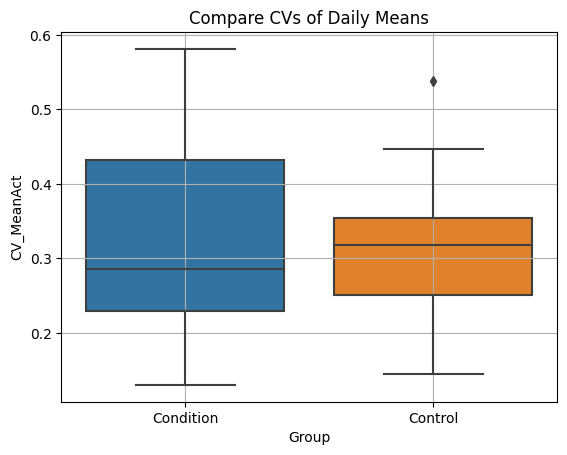

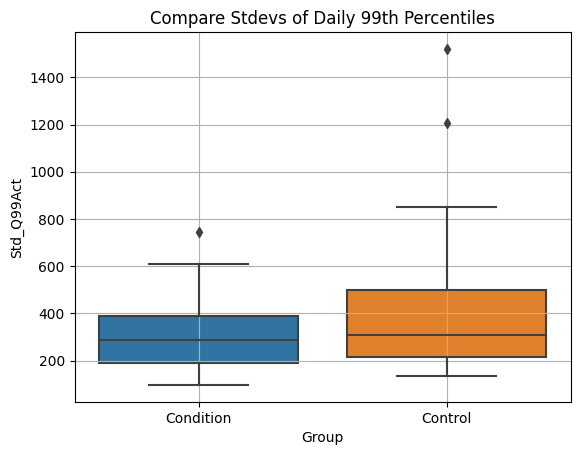

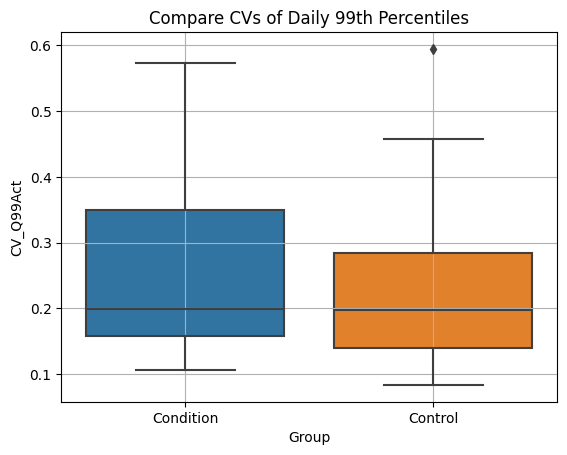

In [ ]:
# compare means of daily means for the two groups
sns.boxplot(data=combined_stats, x='Group', y='Mean_MeanAct')
plt.title('Compare Means of Daily Means')
plt.grid()
plt.show()

# compare means of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='Mean_Q99Act')
plt.title('Compare Means of Daily 99th Percentiles')
plt.grid()
plt.show()

# compare stdevs of daily means
sns.boxplot(data=combined_stats, x='Group', y='Std_MeanAct')
plt.title('Compare Stdevs of Daily Means')
plt.grid()
plt.show()

# compare CVs of daily means
sns.boxplot(data=combined_stats, x='Group', y='CV_MeanAct')
plt.title('Compare CVs of Daily Means')
plt.grid()
plt.show()

# compare stdevs of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='Std_Q99Act')
plt.title('Compare Stdevs of Daily 99th Percentiles')
plt.grid()
plt.show()

# compare CVs of 99th percentiles
sns.boxplot(data=combined_stats, x='Group', y='CV_Q99Act')
plt.title('Compare CVs of Daily 99th Percentiles')
plt.grid()
plt.show()

# Modelling

In [ ]:
import numpy as np
import pickle
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier #model

In [ ]:
def nextday(dates):
    for date in dates:
        yield date

In [ ]:
def zero_count(series):
    return list(series).count(0)

### Feature Extraction

In [ ]:
def extractfeatures(X, date):
    mask = X['date'] == date
    d = {
        'mean_log_activity': X[mask]['log_activity'].mean(),
        'std_log_activity': X[mask]['log_activity'].std(),
        'min_log_activity': X[mask]['log_activity'].min(),
        'max_log_activity': X[mask]['log_activity'].max(),
        'zero_proportion_activity': zero_count(X[mask]['log_activity'])
    }
    return d

### Pre-Processing the Data

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ExtractData(BaseEstimator, TransformerMixin):

    def __init__(self, path):
        self.path = path
        self.X = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        dirs = os.listdir(self.path)

        for filepath in sorted(dirs, key=lambda x: x.split('_')[0]):
            condition = filepath.split('.')[0]
            if filepath.endswith('.csv'):
                X = pd.read_csv(self.path + filepath)
                X['log_activity'] = np.log(X['activity'] + 1)
                dates = X.date.unique()

                for date in nextday(dates):
                    d = extractfeatures(X, date)
                    d['source'] = condition
                    self.X.append(d)


        return pd.DataFrame(self.X)

In [ ]:
e = ExtractData(path='/content/drive/My Drive/depression_data/condition/')
conditions = e.fit_transform(X=None, y=None)
conditions['state'] = 1

In [ ]:
conditions.tail()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
400,3.892345,2.563584,0.0,7.947679,406,condition_10,1
401,3.660818,2.737464,0.0,7.574045,464,condition_10,1
402,3.800930,2.857315,0.0,7.885329,477,condition_10,1
403,1.159077,2.127866,0.0,7.761319,1077,condition_10,1
404,0.413778,1.388504,0.0,6.820016,452,condition_10,1


In [ ]:
conditions.head()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
0,4.693962,2.312900,0.0,7.870548,145,condition_13,1
1,3.951784,2.677267,0.0,7.653020,400,condition_13,1
2,3.781908,2.681108,0.0,7.560080,428,condition_13,1
3,2.700721,2.625415,0.0,7.434848,647,condition_13,1
4,3.888902,2.711044,0.0,7.808323,394,condition_13,1


In [ ]:
e = ExtractData(path='/content/drive/My Drive/depression_data/control/')
controls = e.fit_transform(X=None, y=None)
controls['state'] = 0

In [ ]:
controls.tail()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
734,3.464313,2.528359,0.0,7.609367,426,control_11,0
735,2.027352,2.593273,0.0,7.233455,869,control_11,0
736,0.007676,0.147352,0.0,3.401197,1436,control_11,0
737,0.000963,0.036532,0.0,1.386294,1439,control_11,0
738,0.604805,1.687123,0.0,7.889459,724,control_11,0


In [ ]:
controls.head()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
0,5.234330,1.777446,0.0,8.879472,52,control_24,0
1,3.854702,2.940283,0.0,8.987322,465,control_24,0
2,3.761496,2.903166,0.0,8.848653,481,control_24,0
3,4.145333,2.933503,0.0,8.987322,427,control_24,0
4,3.719044,2.906945,0.0,8.353733,498,control_24,0


In [ ]:
full_df = pd.concat([controls, conditions], ignore_index=True)
full_df.head()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
0,5.234330,1.777446,0.0,8.879472,52,control_24,0
1,3.854702,2.940283,0.0,8.987322,465,control_24,0
2,3.761496,2.903166,0.0,8.848653,481,control_24,0
3,4.145333,2.933503,0.0,8.987322,427,control_24,0
4,3.719044,2.906945,0.0,8.353733,498,control_24,0


In [ ]:
full_df.tail()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
1139,3.892345,2.563584,0.0,7.947679,406,condition_10,1
1140,3.660818,2.737464,0.0,7.574045,464,condition_10,1
1141,3.800930,2.857315,0.0,7.885329,477,condition_10,1
1142,1.159077,2.127866,0.0,7.761319,1077,condition_10,1
1143,0.413778,1.388504,0.0,6.820016,452,condition_10,1


In [ ]:
full_df.shape

(1144, 7)

In [ ]:
# reshufle the dataset

full_df = full_df.sample(frac=1)

### Splitting the Data

In [ ]:
def custom_train_test_split(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set.label
    X_test = test_set.drop('label', axis=1)
    y_test = test_set.label

    return X_train, X_test, y_train, y_test

In [ ]:
class CustomClassifierCV(BaseEstimator, TransformerMixin):

    def __init__(self, base_clf):
        self.base_clf = base_clf

    def fit(self, X, y=None):
        X['label'] = y
        participants = X.source.unique()
        folds = []

        predictions = [] # predicted labels
        actuals = [] # actual labels

        for p in participants:
            folds.append(X[X['source'] == p])

        for i in range(len(folds)):
            test_set = folds[i]
            train_fold = [elem for idx , elem in enumerate(folds) if idx != i]

            train_set = pd.concat(train_fold)
            X_train, X_test, y_train, y_test = custom_train_test_split(train_set.drop(['source'], axis=1),
                                    test_set.drop(['source'], axis=1))

            self.base_clf.fit(X_train, y_train)
            predictions.append(self.predict(X_test))
            actuals.append(test_set.label.iloc[0])

        self.score(predictions, actuals)

    def predict(self, X):
        predictions = self.base_clf.predict(X)
        ones = predictions.tolist().count(1)
        zeroes = predictions.tolist().count(0)

        return 1 if ones > zeroes else 0

    def score(self, predictions, actuals):
        print(classification_report(predictions, actuals))

In [ ]:
X = full_df.drop(['state'], axis=1)
y = full_df.state

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
custom_rfc = CustomClassifierCV(rfc)
custom_rfc.fit(X, y)

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.39      0.69      0.50        13

    accuracy                           0.67        55
   macro avg       0.63      0.68      0.63        55
weighted avg       0.76      0.67      0.70        55



## XG Boost Classifier

In [ ]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
custom_xgb = CustomClassifierCV(xgb)
custom_xgb.fit(X,y)

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        41
           1       0.43      0.71      0.54        14

    accuracy                           0.69        55
   macro avg       0.65      0.70      0.65        55
weighted avg       0.76      0.69      0.71        55



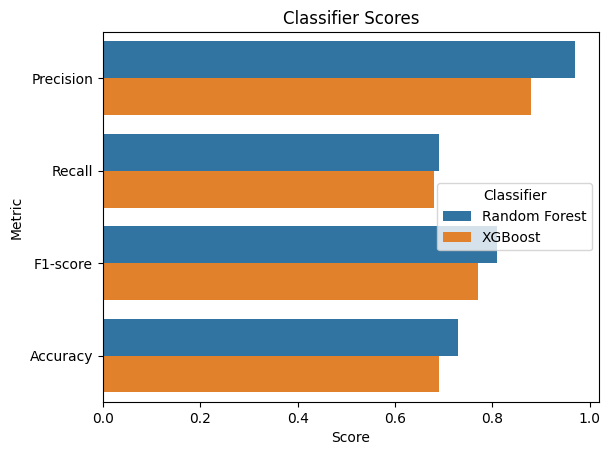

In [ ]:
# Create a list of classifier names and their corresponding scores

classifiers = ['Random Forest', 'XGBoost']
precision = [0.97, 0.88]
recall = [0.69, 0.68]
f1_score = [0.81, 0.77]
accuracy = [0.73, 0.69]

# Create a DataFrame for the scores
scores_df = pd.DataFrame({'Classifier': classifiers, 'Precision': precision, 'Recall': recall,
                          'F1-score': f1_score, 'Accuracy': accuracy})

# Melt the DataFrame to convert it to a long format
scores_df = scores_df.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

# Plot the scores using a bar plot
sns.barplot(x='Score', y='Metric', hue='Classifier', data=scores_df)

# Add labels and title to the plot
plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Classifier Scores')

# Display the plot
plt.show()